# Basic stock comparison to benchmark
By: Jeff W

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as pyplot

- META: Meta Platforms (formerly Facebook) is a tech giant focused on social media, digital advertising, and metaverse technologies.
- TSLA: an electric vehicle and clean energy company in an emerging industry.
- AMD: a semiconductor company, in the competitive chip market, with associated market fluctuations.
- QQQ: Invesco QQQ Trust tracks the Nasdaq-100 Index, representing a basket of the largest non-financial companies listed on the Nasdaq.

In [2]:
stocks = yf.download(['META','TSLA','AMD','QQQ'], start="2023-01-02", end="2024-07-3")
stockData = stocks.loc[:,"Close"].copy()
stockData.head(4)

[*********************100%%**********************]  4 of 4 completed


Ticker,AMD,META,QQQ,TSLA
Date,,,,
2023-01-03,64.019997,124.739998,264.480011,108.099998
2023-01-04,64.660004,127.370003,265.739990,113.639999
2023-01-05,62.330002,126.940002,261.579987,110.339996
2023-01-06,63.959999,130.020004,268.799988,113.059998


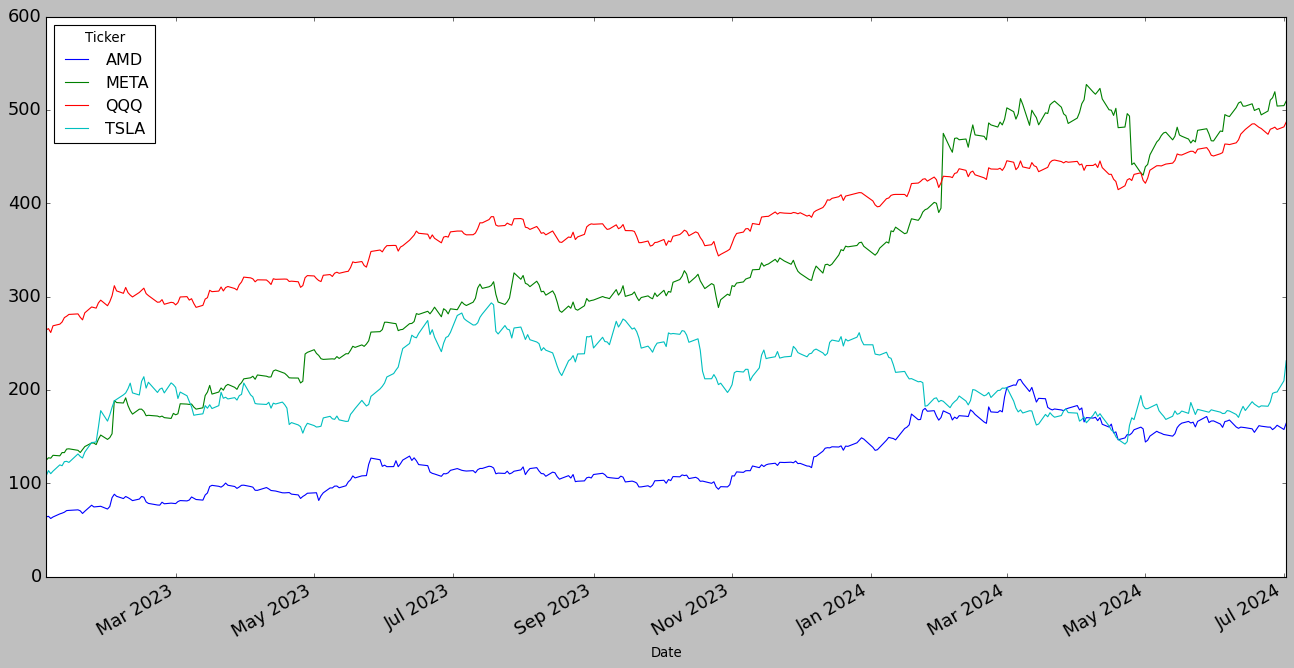

In [19]:
stockData.plot(figsize= (20,10), fontsize=16)
pyplot.style.use("classic")

pyplot.show()

In [4]:
#Difference from previous record
stockData.pct_change()

Ticker,AMD,META,QQQ,TSLA
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.009997,0.021084,0.004764,0.051249
2023-01-05,-0.036035,-0.003376,-0.015654,-0.029039
2023-01-06,0.026151,0.024263,0.027602,0.024651
2023-01-09,0.051282,-0.004230,0.006473,0.059349
...,...,...,...,...
2024-06-26,-0.016911,0.004935,0.002065,0.048145
2024-06-27,0.012251,0.012551,0.002581,0.005347
2024-06-28,0.017182,-0.029525,-0.005191,0.002330


In [5]:
data = stockData.pct_change().dropna()
data

Ticker,AMD,META,QQQ,TSLA
Date,,,,
2023-01-04,0.009997,0.021084,0.004764,0.051249
2023-01-05,-0.036035,-0.003376,-0.015654,-0.029039
2023-01-06,0.026151,0.024263,0.027602,0.024651
2023-01-09,0.051282,-0.004230,0.006473,0.059349
2023-01-10,0.012046,0.027188,0.008464,-0.007681
...,...,...,...,...
2024-06-26,-0.016911,0.004935,0.002065,0.048145
2024-06-27,0.012251,0.012551,0.002581,0.005347
2024-06-28,0.017182,-0.029525,-0.005191,0.002330


In [6]:
data.describe()

Ticker,AMD,META,QQQ,TSLA
count,375.000000,375.000000,375.000000,375.000000
mean,0.002960,0.004066,0.001686,0.002591
std,0.029960,0.025455,0.010722,0.033701
min,-0.092203,-0.105613,-0.024476,-0.121253
25%,-0.014391,-0.008887,-0.005138,-0.017680
50%,0.001111,0.001737,0.001496,0.001628
75%,0.018983,0.014105,0.008311,0.019263
max,0.126281,0.232824,0.035890,0.153069


In [7]:
data = data.describe().T.loc[:,["mean", "std"]] #only interested in mean & std
data

,mean,std
Ticker,,
AMD,0.002960,0.029960
META,0.004066,0.025455
QQQ,0.001686,0.010722
TSLA,0.002591,0.033701


In [10]:
data["mean"] = data["mean"] * 252 #252 trading days in year
data["std"] = data["std"] * np.sqrt(252)
data

,mean,std
Ticker,,
AMD,0.745897,0.475601
META,1.024581,0.404093
QQQ,0.424978,0.170209
TSLA,0.652878,0.534983


/Users/jwilliams/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


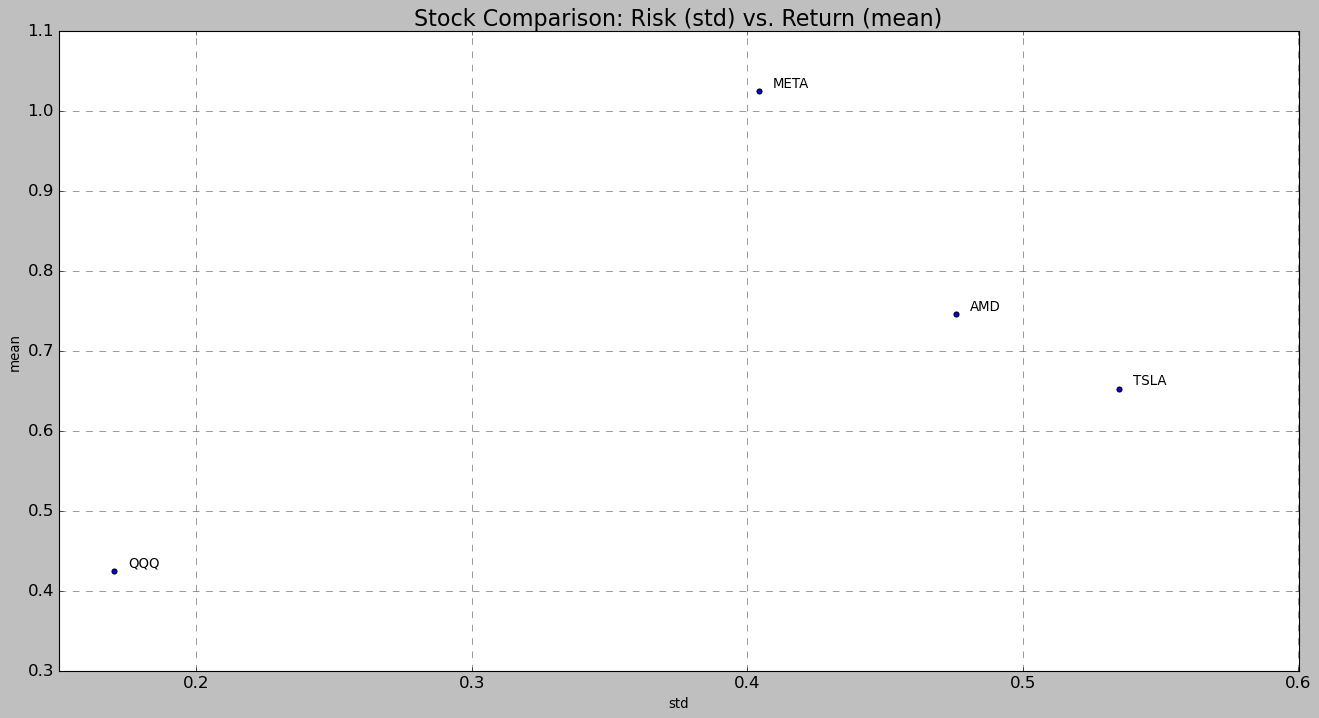

In [20]:
data.plot.scatter(figsize= (20,10), fontsize=15, x="std", y="mean")
pyplot.title("Stock Comparison: Risk (std) vs. Return (mean)", fontsize=20)
pyplot.grid(True, linestyle='--', alpha=0.7)

for idx in data.index: #for loop to annotate
    pyplot.annotate(idx, xy=(data.loc[idx,"std"]+0.005,data.loc[idx,"mean"]+0.005))

From the scatterplot, we can depict:
- QQQ, being a market ETF, shows the most stability but lowest returns. 
- META shows the best balance of high returns with moderate risk. 
- TSLA appears to be the most volatile with high potential returns but high risk.